## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [11]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [12]:
train, test = keras.datasets.cifar10.load_data()

In [13]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = 256
drp_ratio = [0.1,0.3,0.5]
num_neurons = [[512,256],[512,256,256,128],[512,512,256,256,128,128]]

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for ratio in drp_ratio:
    for num in num_neurons:
        keras.backend.clear_session()
        print("Experiment on dropratio=%s neurons=%s" % (str(ratio),str(num)))
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num, drp_ratio=ratio)
        model.summary()
        optimizer = keras.optimizers.Adam()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag = 'ratio=%s;neurons=%s' % (str(ratio),str(num))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment on dropratio=0.1 neurons=[512, 256]
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params:

196/196 [==============================] - 4s 21ms/step - loss: 1.1540 - accuracy: 0.5879 - val_loss: 1.3408 - val_accuracy: 0.5266
Epoch 50/50
196/196 [==============================] - 4s 23ms/step - loss: 1.1473 - accuracy: 0.5875 - val_loss: 1.3471 - val_accuracy: 0.5245
Experiment on dropratio=0.1 neurons=[512, 256, 256, 128]
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________________

Epoch 44/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1811 - accuracy: 0.5740 - val_loss: 1.3624 - val_accuracy: 0.5224
Epoch 45/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1756 - accuracy: 0.5735 - val_loss: 1.3620 - val_accuracy: 0.5177
Epoch 46/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1712 - accuracy: 0.5786 - val_loss: 1.3632 - val_accuracy: 0.5246
Epoch 47/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1678 - accuracy: 0.5797 - val_loss: 1.3453 - val_accuracy: 0.5291
Epoch 48/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1560 - accuracy: 0.5818 - val_loss: 1.3799 - val_accuracy: 0.5206
Epoch 49/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1555 - accuracy: 0.5821 - val_loss: 1.3884 - val_accuracy: 0.5190
Epoch 50/50
196/196 [==============================] - 5s 25ms/step - loss: 1.1494 - accuracy: 0.5838 - val_loss: 1.3550 - val_accuracy:

196/196 [==============================] - 6s 32ms/step - loss: 1.2626 - accuracy: 0.5506 - val_loss: 1.3859 - val_accuracy: 0.5145
Epoch 36/50
196/196 [==============================] - 6s 32ms/step - loss: 1.2665 - accuracy: 0.5462 - val_loss: 1.3776 - val_accuracy: 0.5104
Epoch 37/50
196/196 [==============================] - 6s 32ms/step - loss: 1.2529 - accuracy: 0.5518 - val_loss: 1.3678 - val_accuracy: 0.5187
Epoch 38/50
196/196 [==============================] - 6s 32ms/step - loss: 1.2521 - accuracy: 0.5536 - val_loss: 1.3593 - val_accuracy: 0.5224
Epoch 39/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2402 - accuracy: 0.5552 - val_loss: 1.3776 - val_accuracy: 0.5161
Epoch 40/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2326 - accuracy: 0.5624 - val_loss: 1.3666 - val_accuracy: 0.5152
Epoch 41/50
196/196 [==============================] - 6s 32ms/step - loss: 1.2262 - accuracy: 0.5612 - val_loss: 1.3740 - val_accuracy: 0.5177
Epoc

Epoch 34/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5639 - accuracy: 0.4344 - val_loss: 1.5364 - val_accuracy: 0.4630
Epoch 35/50
196/196 [==============================] - 5s 23ms/step - loss: 1.5626 - accuracy: 0.4385 - val_loss: 1.5531 - val_accuracy: 0.4619
Epoch 36/50
196/196 [==============================] - 5s 23ms/step - loss: 1.5658 - accuracy: 0.4342 - val_loss: 1.5343 - val_accuracy: 0.4700
Epoch 37/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5408 - accuracy: 0.4471 - val_loss: 1.4943 - val_accuracy: 0.4801
Epoch 38/50
196/196 [==============================] - 5s 25ms/step - loss: 1.5449 - accuracy: 0.4441 - val_loss: 1.5030 - val_accuracy: 0.4657
Epoch 39/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5408 - accuracy: 0.4436 - val_loss: 1.5109 - val_accuracy: 0.4681
Epoch 40/50
196/196 [==============================] - 4s 23ms/step - loss: 1.5501 - accuracy: 0.4428 - val_loss: 1.5071 - val_accuracy:

Epoch 29/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6438 - accuracy: 0.4056 - val_loss: 1.5779 - val_accuracy: 0.4470
Epoch 30/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6399 - accuracy: 0.4071 - val_loss: 1.5949 - val_accuracy: 0.4435
Epoch 31/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6374 - accuracy: 0.4077 - val_loss: 1.5769 - val_accuracy: 0.4400
Epoch 32/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6394 - accuracy: 0.4075 - val_loss: 1.5914 - val_accuracy: 0.4511
Epoch 33/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6341 - accuracy: 0.4103 - val_loss: 1.5891 - val_accuracy: 0.4371
Epoch 34/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6306 - accuracy: 0.4115 - val_loss: 1.6037 - val_accuracy: 0.4311
Epoch 35/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6272 - accuracy: 0.4140 - val_loss: 1.5612 - val_accuracy:

196/196 [==============================] - 6s 31ms/step - loss: 1.8319 - accuracy: 0.3206 - val_loss: 1.8127 - val_accuracy: 0.3430
Epoch 21/50
196/196 [==============================] - 6s 33ms/step - loss: 1.8242 - accuracy: 0.3261 - val_loss: 1.7817 - val_accuracy: 0.3586
Epoch 22/50
196/196 [==============================] - 6s 31ms/step - loss: 1.8258 - accuracy: 0.3231 - val_loss: 1.8171 - val_accuracy: 0.3352
Epoch 23/50
196/196 [==============================] - 6s 30ms/step - loss: 1.8266 - accuracy: 0.3253 - val_loss: 1.8456 - val_accuracy: 0.3408
Epoch 24/50
196/196 [==============================] - 6s 31ms/step - loss: 1.8207 - accuracy: 0.3262 - val_loss: 1.7826 - val_accuracy: 0.3554
Epoch 25/50
196/196 [==============================] - 6s 30ms/step - loss: 1.8184 - accuracy: 0.3283 - val_loss: 1.7952 - val_accuracy: 0.3499
Epoch 26/50
196/196 [==============================] - 6s 31ms/step - loss: 1.8206 - accuracy: 0.3287 - val_loss: 1.8023 - val_accuracy: 0.3482
Epoc

Epoch 19/50
196/196 [==============================] - 4s 21ms/step - loss: 1.8321 - accuracy: 0.3263 - val_loss: 1.8433 - val_accuracy: 0.3753
Epoch 20/50
196/196 [==============================] - 4s 21ms/step - loss: 1.8355 - accuracy: 0.3246 - val_loss: 1.8306 - val_accuracy: 0.3712
Epoch 21/50
196/196 [==============================] - 4s 22ms/step - loss: 1.8241 - accuracy: 0.3269 - val_loss: 1.8072 - val_accuracy: 0.3719
Epoch 22/50
196/196 [==============================] - 4s 21ms/step - loss: 1.8280 - accuracy: 0.3275 - val_loss: 1.8278 - val_accuracy: 0.3795
Epoch 23/50
196/196 [==============================] - 4s 22ms/step - loss: 1.8213 - accuracy: 0.3302 - val_loss: 1.7999 - val_accuracy: 0.3768
Epoch 24/50
196/196 [==============================] - 4s 21ms/step - loss: 1.8247 - accuracy: 0.3320 - val_loss: 1.8069 - val_accuracy: 0.3819
Epoch 25/50
196/196 [==============================] - 4s 21ms/step - loss: 1.8166 - accuracy: 0.3329 - val_loss: 1.8021 - val_accuracy:

Epoch 14/50
196/196 [==============================] - 5s 24ms/step - loss: 2.0655 - accuracy: 0.2061 - val_loss: 2.0585 - val_accuracy: 0.2017
Epoch 15/50
196/196 [==============================] - 5s 24ms/step - loss: 2.0627 - accuracy: 0.2081 - val_loss: 2.1185 - val_accuracy: 0.2118
Epoch 16/50
196/196 [==============================] - 5s 24ms/step - loss: 2.0599 - accuracy: 0.2045 - val_loss: 2.0992 - val_accuracy: 0.2198
Epoch 17/50
196/196 [==============================] - 5s 24ms/step - loss: 2.0582 - accuracy: 0.2080 - val_loss: 2.0744 - val_accuracy: 0.2111
Epoch 18/50
196/196 [==============================] - 5s 24ms/step - loss: 2.0458 - accuracy: 0.2141 - val_loss: 2.1303 - val_accuracy: 0.1997
Epoch 19/50
196/196 [==============================] - 5s 25ms/step - loss: 2.0422 - accuracy: 0.2141 - val_loss: 2.0770 - val_accuracy: 0.2076
Epoch 20/50
196/196 [==============================] - 5s 24ms/step - loss: 2.0381 - accuracy: 0.2162 - val_loss: 2.1920 - val_accuracy:

196/196 [==============================] - 6s 32ms/step - loss: 2.1467 - accuracy: 0.1686 - val_loss: 2.2198 - val_accuracy: 0.1341
Epoch 6/50
196/196 [==============================] - 6s 32ms/step - loss: 2.1405 - accuracy: 0.1738 - val_loss: 2.2453 - val_accuracy: 0.1127
Epoch 7/50
196/196 [==============================] - 6s 32ms/step - loss: 2.1355 - accuracy: 0.1723 - val_loss: 2.2330 - val_accuracy: 0.1230
Epoch 8/50
196/196 [==============================] - 6s 31ms/step - loss: 2.1392 - accuracy: 0.1708 - val_loss: 2.2197 - val_accuracy: 0.1284
Epoch 9/50
196/196 [==============================] - 6s 31ms/step - loss: 2.1353 - accuracy: 0.1708 - val_loss: 2.2098 - val_accuracy: 0.1320
Epoch 10/50
196/196 [==============================] - 6s 31ms/step - loss: 2.1316 - accuracy: 0.1714 - val_loss: 2.2203 - val_accuracy: 0.1278
Epoch 11/50
196/196 [==============================] - 6s 31ms/step - loss: 2.1286 - accuracy: 0.1724 - val_loss: 2.2238 - val_accuracy: 0.1261
Epoch 12

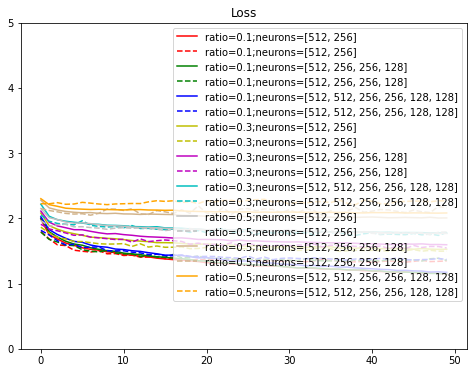

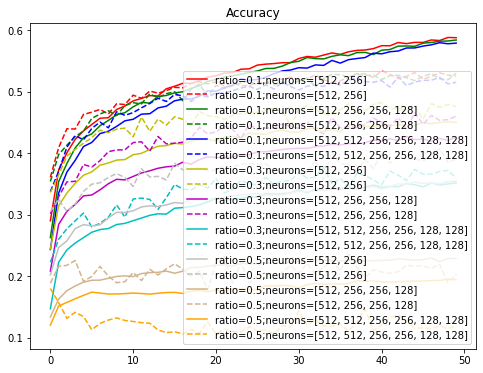

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "c", "silver", "tan", "orange"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()